# Exploratory Data Analysis (Video Game Sales)

Melakukan analisa terhadap hasil penjualan game dari berbagai perusahaan, berbagai jenis game, dan berbagai platform game yang digunakan dari tahun 1980 sehingga mendapatkan kesimpulan hasil penjualan dari tahun ke tahun berdasarkan penjualan secara regional dan global.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Masukkan data
df = pd.read_csv("vgsales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#Cek informasi data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(16598, 11)

Pada data diatas, terdapat 11 kolom dan 16291 baris data yang berisikan informasi sebagai berikut:

- Rank = Peringkat Penjualan
- Name = Nama Game
- Platform = Jenis Perangkat Permainan
- Year = Tahun Rilis
- Genre = Jenis Permainan
- Publisher = Perusahaan yang merilis permainan
- NA_Sales = Penjualan di North America (dalam jutaan dollar)
- EU_Sales = Penjualan di Europa (dalam jutaan dollar)
- JP_Sales = Penjualan di Japan (dalam jutaan dollar)
- Other_Sales = Penjualan dibenua/ negara lain (dalam jutaan dollar)
- Global_Sales = Total Penjualan didunia (dalam jutaan dollar)

Namun, pada keterangan tahun rilis tidak seharusnya dalam bentuk Float (seperti pada baris pertama yaitu 2006.0, sehingga data dari tahun rilis akan diubah nantinya agar memudahkan proses analisa.

In [5]:
#Periksa data yang hilang
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#Periksa data yang hilang
df.isnull().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Pada data tersebut, terdapat 271 game yang tidak memiliki tahun rilis (1.6%) dan 58 game yang tidak tahu diproduksi oleh perusahaan apa (0.3%) dengan total keseluruhan sebesar 1.9% data yang hilang. Data tersebut akan dihapus dan dihilangkan agar memudahkan proses analisa lebih lanjut.

In [7]:
#Menghapus data yang hilang
df.dropna(inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
#Indexing data berdasarkan ranking
df=df.set_index('Rank')

In [9]:
#Ubah bentuk data tahun rilis dari float menjadi integer
df['Year'] = df['Year'].astype('int')
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
#Cek data yang memiliki duplikat
df.duplicated().sum()

0

# Exploratory Data Analysis

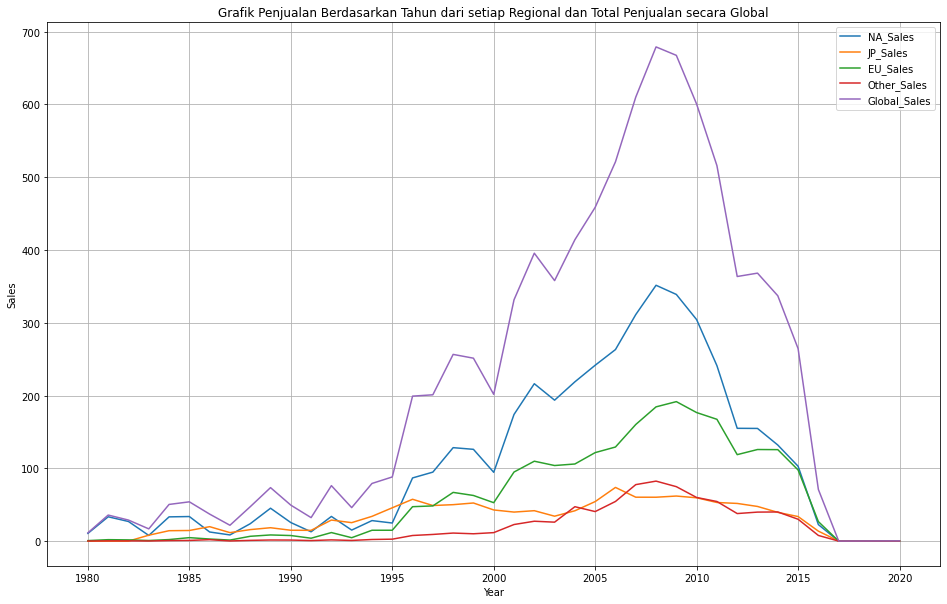

In [11]:
#Grafik penjualan berdasarkan tahun dari setiap regional
over_year = df.groupby(["Year"])["NA_Sales", "JP_Sales", 'EU_Sales','Other_Sales', 'Global_Sales'].sum()
over_year.plot(figsize=(16,10))
plt.title('Grafik Penjualan Berdasarkan Tahun dari setiap Regional dan Total Penjualan secara Global')
plt.ylabel("Sales")
plt.grid()
plt.show()

Pada grafik diatas, data penjualan game ditahun 2016 keatas hingga tahun 2020 tidak terdata, sehingga data penjualan diatas tahun 2016 akan dihilangkan.

In [12]:
#Hilangkan data penjualan diatas tahun 2016
df.drop(df[df['Year']>2016].index, inplace=True)

In [13]:
#Memilah data dengan categorical dan numerical
categorical_data = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
numerical_data = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [14]:
cat_data = df[categorical_data]
num_data = df[numerical_data]

In [15]:
cat_data

,Name,Platform,Year,Genre,Publisher
Rank,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo
2,Super Mario Bros.,NES,1985,Platform,Nintendo
3,Mario Kart Wii,Wii,2008,Racing,Nintendo
4,Wii Sports Resort,Wii,2009,Sports,Nintendo
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo
...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision


In [16]:
num_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,
1,41.49,29.02,3.77,8.46,82.74
2,29.08,3.58,6.81,0.77,40.24
3,15.85,12.88,3.79,3.31,35.82
4,15.75,11.01,3.28,2.96,33.00
5,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16596,0.01,0.00,0.00,0.00,0.01
16597,0.01,0.00,0.00,0.00,0.01
16598,0.00,0.00,0.00,0.00,0.01


In [17]:
#Cek deskripsi penjualan secara statistik
num_data.describe(include='all')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,0.265695,0.147768,0.078849,0.048437,0.541022
std,0.822525,0.509360,0.311916,0.190105,1.567520
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
num_data.median()

NA_Sales        0.08
EU_Sales        0.02
JP_Sales        0.00
Other_Sales     0.01
Global_Sales    0.17
dtype: float64

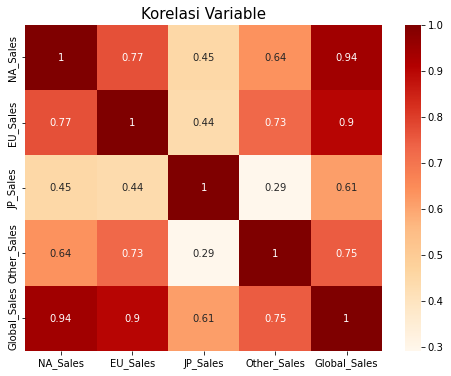

In [19]:
#Korelasi variable
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(num_data.corr().round(3), annot=True, cmap='OrRd', ax=ax)
ax.set_title('Korelasi Variable', fontsize=15);

- Korelasi paling tinggi diperoleh dari penjualan regional NA dan Global yaitu 0.94.
- Penjualan regional NA dan Global dapat dijadikan sebagai acuan untuk penilaian.

Lalu, bagaimana distribusi penjualan pada data dari setiap regional dan secara global?

''

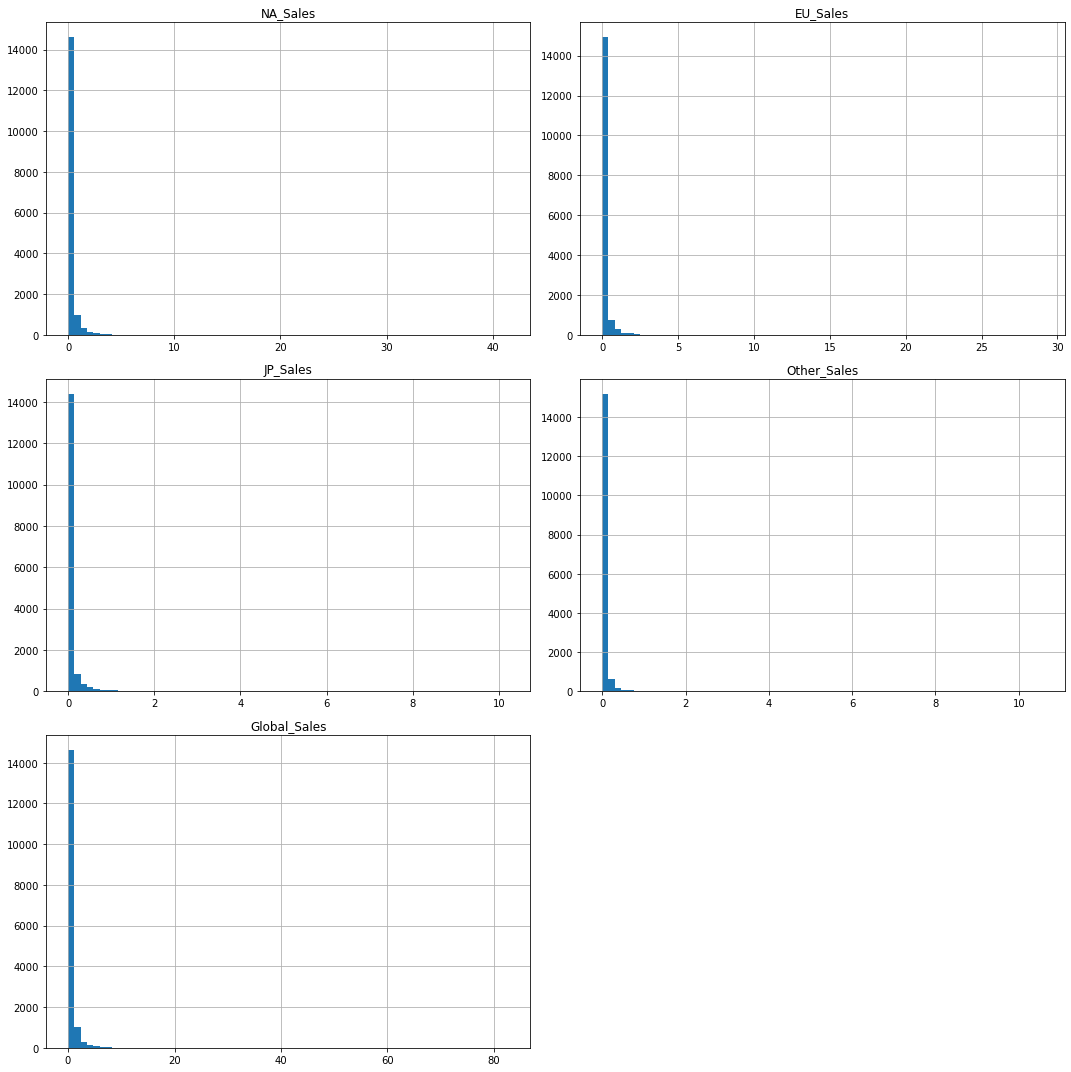

In [20]:
#Distribusi hasil penjualan dari regional dan global
num_data.hist(figsize=(15,15),bins=70)
plt.tight_layout()
;

Dari hasil grafik histogram diatas, diperoleh informasi sebagai berikut:
- Distribusi game lebih banyak berada direntang <0.1 million dikarenakan banyak publisher merilis berbagai macam game dan tidak semua memiliki tingkat penjualan yang tinggi.
- Data dari histogram tersebut merupakan 'Right-Skewed'

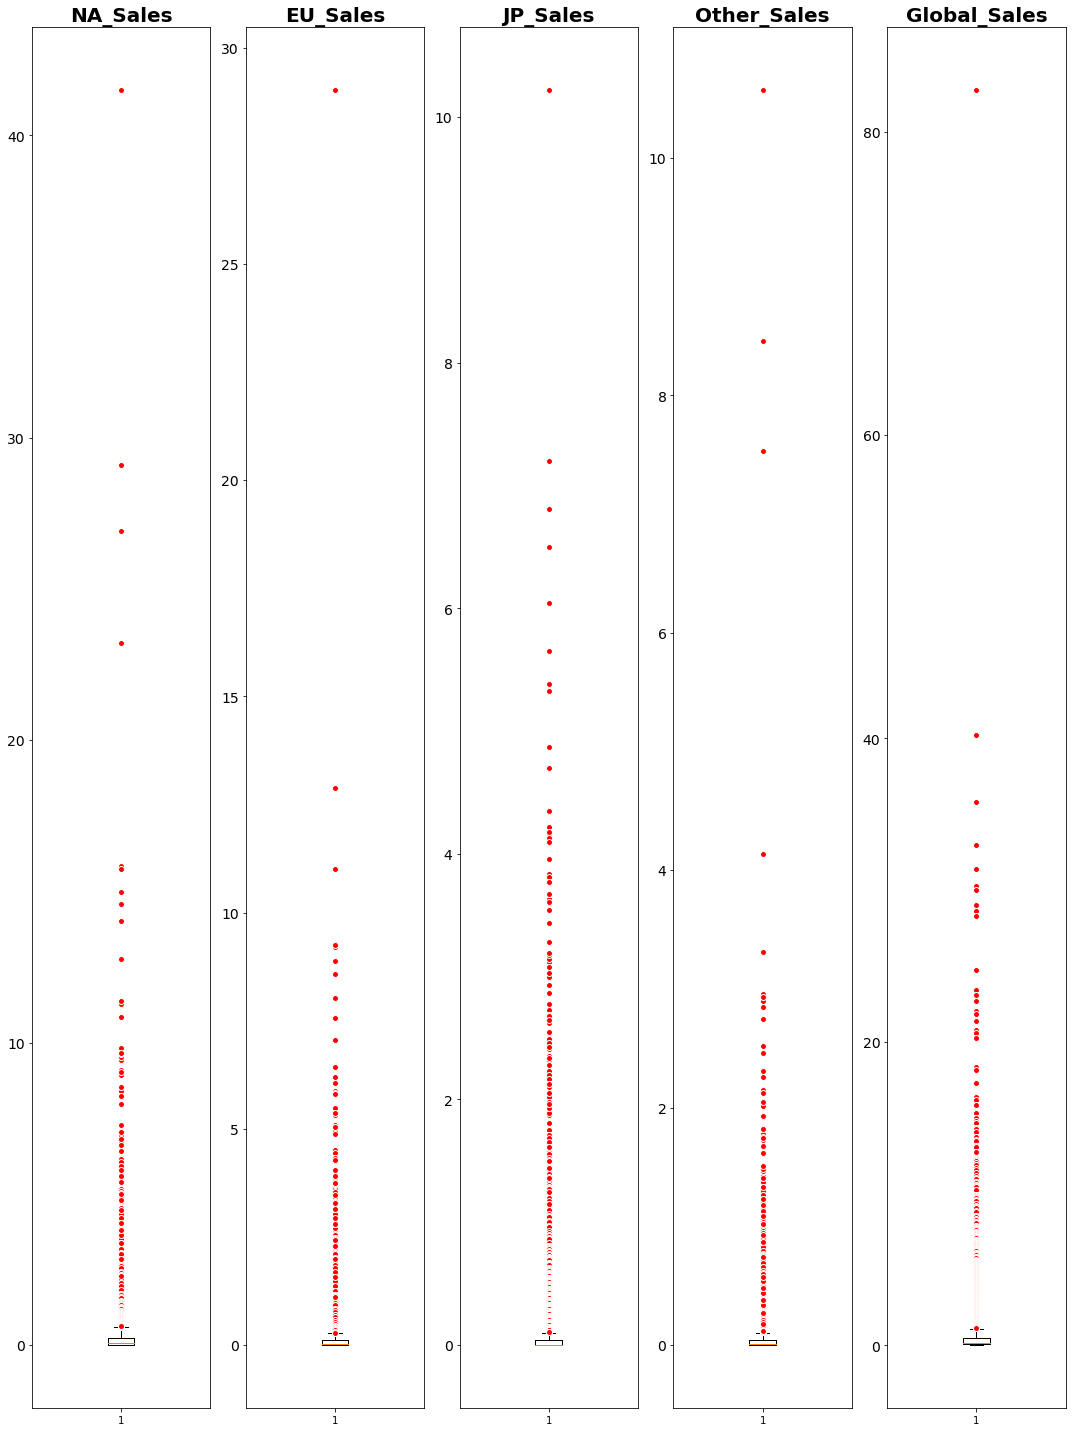

In [21]:
#Visualisasi dengan Boxplot
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(num_data.columns), figsize=(15,20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(num_data.iloc[:,i], flierprops=red_circle)
    num_data.iloc[:,i]
    ax.set_title(num_data.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [22]:
#Inter quartile range (IQR) method
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1

In [23]:
Q1

NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.06
Name: 0.25, dtype: float64

In [24]:
Q3

NA_Sales        0.24
EU_Sales        0.11
JP_Sales        0.04
Other_Sales     0.04
Global_Sales    0.48
Name: 0.75, dtype: float64

In [25]:
IQR

NA_Sales        0.24
EU_Sales        0.11
JP_Sales        0.04
Other_Sales     0.04
Global_Sales    0.42
dtype: float64

In [26]:
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

In [27]:
min_IQR

NA_Sales       -0.360
EU_Sales       -0.165
JP_Sales       -0.060
Other_Sales    -0.060
Global_Sales   -0.570
dtype: float64

In [28]:
max_IQR

NA_Sales        0.600
EU_Sales        0.275
JP_Sales        0.100
Other_Sales     0.100
Global_Sales    1.110
dtype: float64

In [29]:
nilai_min = num_data.min()
nilai_max = num_data.max()

In [30]:
nilai_min

NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.01
dtype: float64

In [31]:
nilai_max

NA_Sales        41.49
EU_Sales        29.02
JP_Sales        10.22
Other_Sales     10.57
Global_Sales    82.74
dtype: float64

# TOP SELLING

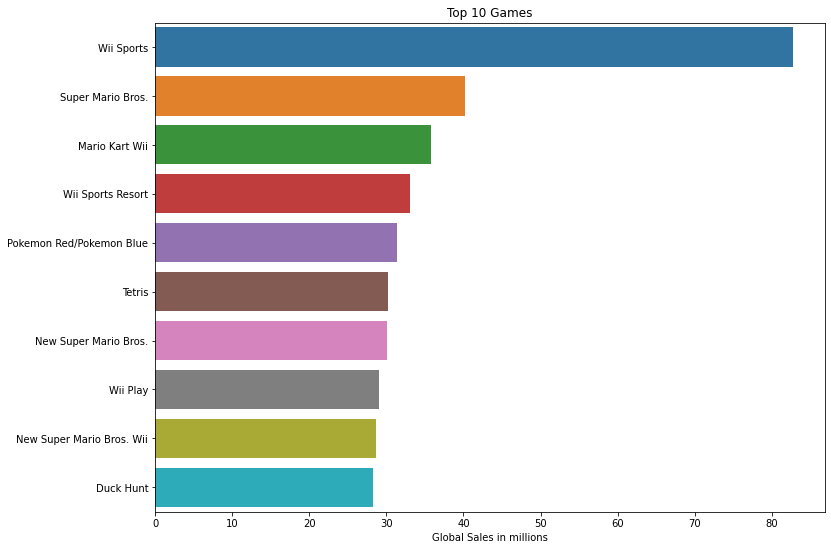

In [32]:
top_10_games = df.sort_values("Global_Sales",ascending=False).head(10)

plt.figure(figsize=(12,9))
sns.barplot(y=top_10_games.Name, x=top_10_games.Global_Sales)
plt.title("Top 10 Games")
plt.ylabel('')
plt.xlabel('Global Sales in millions')
plt.show()

In [33]:
top_10_publishers = df['Publisher'].value_counts()
top_10_publishers = top_10_publishers.head(10)

top_10_publishers_sales = df.groupby('Publisher').sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)

In [34]:
top_10_publishers

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [35]:
top_10_publishers.sum()

8105

In [36]:
top_10_publishers_sales

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.66
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [37]:
top_10_publishers_sales.sum()

6222.37

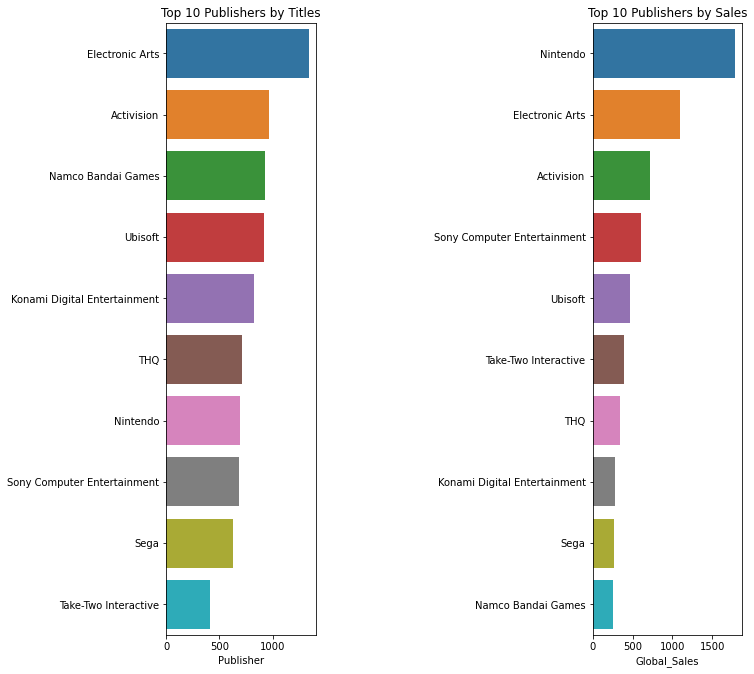

In [38]:
fig, ax = plt.subplots(1,2,figsize=(10,10), gridspec_kw=dict(width_ratios=[10,10]))

sns.barplot(y=top_10_publishers.index, x=top_10_publishers, ax=ax[0])
ax[0].set_title("Top 10 Publishers by Titles")
plt.xlabel("Titles")


sns.barplot(y=top_10_publishers_sales.index, x=top_10_publishers_sales, ax=ax[1])
ax[1].set_title("Top 10 Publishers by Sales")
plt.ylabel('')

plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.9, wspace=1.85, hspace=0.35)
plt.show()

In [39]:
top_10_platforms = df['Platform'].value_counts()
top_10_platforms = top_10_platforms.head(10)

top_10_platforms_sales = df.groupby('Platform').sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)

In [40]:
top_10_platforms

DS      2130
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

In [41]:
top_10_platforms.sum()

12998

In [42]:
top_10_platforms_sales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.62
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.07
PC       254.70
Name: Global_Sales, dtype: float64

In [43]:
top_10_platforms_sales.sum()

6738.329999999999

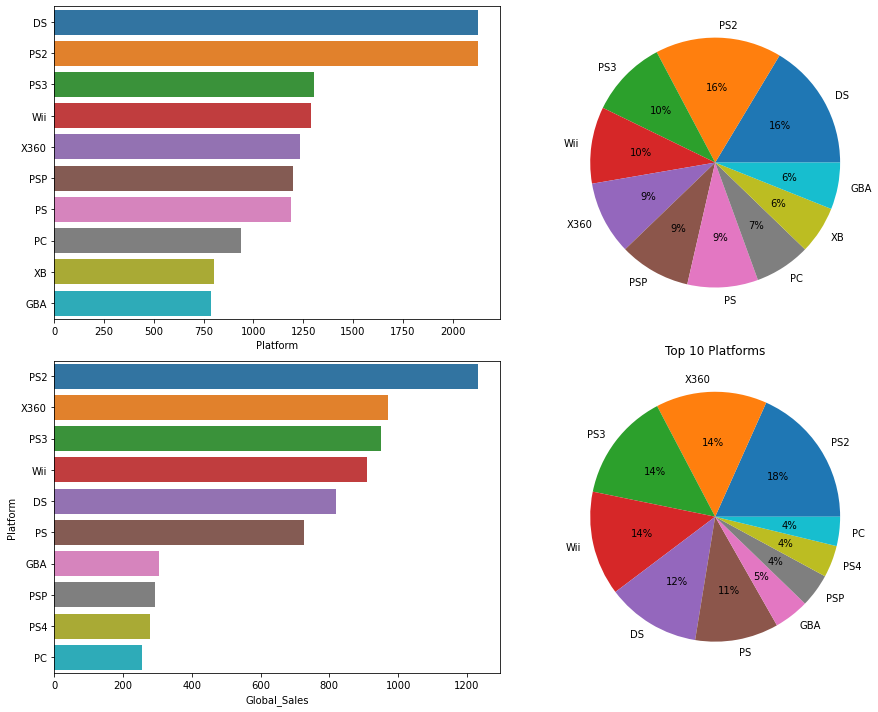

In [44]:
fig, ax = plt.subplots(2,2,figsize=(14,10), gridspec_kw=dict(width_ratios=[4,5]))

sns.barplot(y=top_10_platforms.index, x=top_10_platforms,ax=ax[0,0])
plt.title("Top 10 Platforms")
ax[0,1].pie(top_10_platforms, labels=top_10_platforms.index, autopct="%.0f%%")
plt.title("Top 10 Platforms")

sns.barplot(y=top_10_platforms_sales.index, x=top_10_platforms_sales,ax=ax[1,0])
plt.title("Top 10 Platforms")
ax[1,1].pie(top_10_platforms_sales, labels=top_10_platforms_sales.index, autopct="%.0f%%")
plt.title("Top 10 Platforms")

fig.tight_layout()

In [45]:
top_10_genre =  df['Genre'].value_counts()
top_10_genre = top_10_genre.head(10)

top_10_genre_sales = df.groupby('Genre').sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)

In [46]:
top_10_genre

Action          3250
Sports          2304
Misc            1686
Role-Playing    1468
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Name: Genre, dtype: int64

In [47]:
top_10_genre.sum()

15047

In [48]:
top_10_genre_sales

Genre
Action          1722.83
Sports          1309.24
Shooter         1026.20
Role-Playing     923.79
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.69
Puzzle           242.21
Name: Global_Sales, dtype: float64

In [49]:
top_10_genre_sales.sum()

8403.769999999999

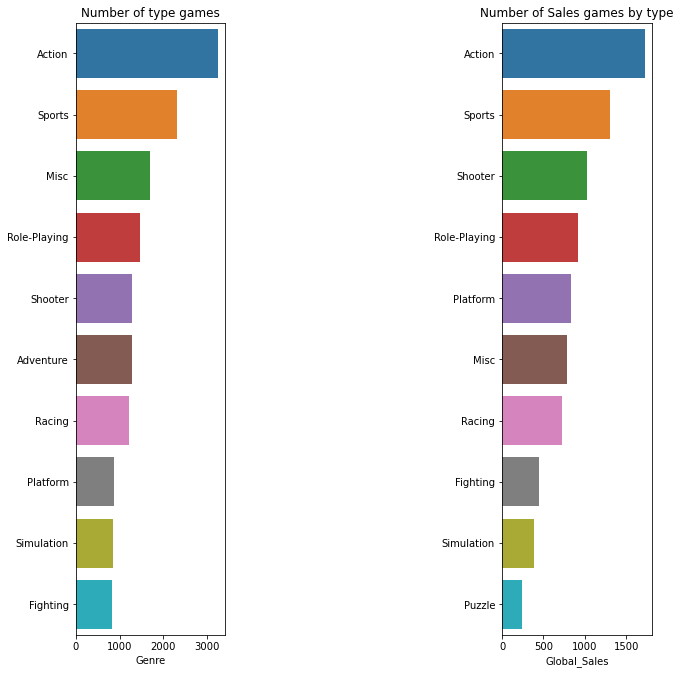

In [50]:
fig, ax = plt.subplots(1,2,figsize=(10,10), gridspec_kw=dict(width_ratios=[10,10]))

sns.barplot(y=top_10_genre.index, x=top_10_genre, ax=ax[0])
ax[0].set_title("Number of type games")
plt.xlabel('Amount of Games by type')

sns.barplot(y=top_10_genre_sales.index, x=top_10_genre_sales,ax=ax[1])
ax[1].set_title("Number of Sales games by type")
plt.ylabel('')
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.9, wspace=1.85, hspace=0.35)
plt.show()

# Case :
- Publisher mana yang paling banyak melakukan penjualan?
- Game apa yang paling banyak terjual secara global?
- Genre game yang paling diminati?
- Platform game apa yang paling banyak dimainkan?

In [51]:
#Publisher mana yang paling banyak melakukan penjualan?
top_publisher = df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)
top_publisher

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.66
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [52]:
top_publisher.sum()

6222.37

In [53]:
#Game apa yang paling banyak terjual secara global?
top_game = df.groupby(['Name','Platform','Year','Genre','Publisher'])[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)
top_game

Name                       Platform  Year  Genre         Publisher
Wii Sports                 Wii       2006  Sports        Nintendo     82.74
Super Mario Bros.          NES       1985  Platform      Nintendo     40.24
Mario Kart Wii             Wii       2008  Racing        Nintendo     35.82
Wii Sports Resort          Wii       2009  Sports        Nintendo     33.00
Pokemon Red/Pokemon Blue   GB        1996  Role-Playing  Nintendo     31.37
Tetris                     GB        1989  Puzzle        Nintendo     30.26
New Super Mario Bros.      DS        2006  Platform      Nintendo     30.01
Wii Play                   Wii       2006  Misc          Nintendo     29.02
New Super Mario Bros. Wii  Wii       2009  Platform      Nintendo     28.62
Duck Hunt                  NES       1984  Shooter       Nintendo     28.31
Name: Global_Sales, dtype: float64

In [54]:
top_game.sum()

369.39

In [55]:
#Genre game yang paling diminati?
top_genre = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)
top_genre

Genre
Action          1722.83
Sports          1309.24
Shooter         1026.20
Role-Playing     923.79
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.69
Puzzle           242.21
Name: Global_Sales, dtype: float64

In [56]:
top_genre.sum()

8403.769999999999

In [57]:
#Platform game apa yang paling banyak dimainkan?
top_platform = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(10)
top_platform

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.62
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.07
PC       254.70
Name: Global_Sales, dtype: float64

In [58]:
top_platform.sum()

6738.329999999999